<a href="https://colab.research.google.com/github/cdm4Ki90L1t/Repeated_hospitalization/blob/main/Repeated_hospitalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Задача:**
Вы работаете в консалтинговой компании, помогающей больничной группе лучше понимать повторную госпитализацию пациентов. Больница предоставила вам доступ к накопленной за десять лет информации о пациентах, повторно поступивших в больницу после выписки. Врачи хотят, чтобы вы оценили, могут ли первоначальные диагнозы, количество процедур или другие переменные помочь им лучше понять вероятность повторной госпитализации.

Они хотят сосредоточить последующие звонки и внимание на тех пациентах, у которых более высокая вероятность повторной госпитализации.
*   Каков наиболее распространенный первичный диагноз в разбивке по возрастным группам?
*   Некоторые врачи полагают, что диабет может играть центральную роль в повторной госпитализации. Изучите влияние диагноза диабета на частоту повторной госпитализации.
*   На каких группах пациентов больнице следует сосредоточить свои последующие усилия, чтобы лучше контролировать пациентов с высокой вероятностью повторной госпитализации?

##**Информация в наборе данных**


*   "age" - возрастная категория пациента
*   "time_in_hospital" - дни (с 1 по 14)
*    "n_procedures" - количество процедур, выполненных во время пребывания в больнице
*    "n_lab_procedures" - количество лабораторных процедур, выполненных во время пребывания в больнице
*    "n_medications" - количество лекарств, введенных во время пребывания в больнице.
*    "n_outpatient" - количество амбулаторных посещений за год до госпитализации.
*    "n_inpatient" - количество посещений стационара за год до пребывания в больнице.
*    "n_emergency" - количество посещений отделения неотложной помощи за год до госпитализации.
*    "medical_specialty" - специальность принимающего врача
*    "diag_1" - первичный диагноз (системы кровообращения, дыхания, пищеварения и т.д.)
*    "diag_2" - вторичный диагноз
*    "diag_3" - дополнительный вторичный диагноз
*    "glucose_test" - был ли уровень глюкозы в сыворотке крови высоким (> 200), нормальным или не выполнялся
*    "A1Ctest" - был ли уровень A1C у пациента высоким (> 7%), нормальным или не выполнялся
*    "change" - было ли изменение в лечении диабета ("да" или "нет")
*    "diabetes_med" - было ли назначено лекарство от диабета ("да" или "нет")
*    "readmitted" - если пациент был повторно принят в больнице ("да" или "нет")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm


In [2]:
df = pd.read_csv("hospital_readmissions.csv")

о наборе данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [ ]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


**Задача №1**

Каков наиболее распространенный первичный диагноз в разбивке по возрастным группам?

Для того чтобы узнать наиболее распространенный первичный диагноз в разбивке по возрастным группам напишем код и прогнозируем результаты (*Листинг 1*):

***Листинг 1:***

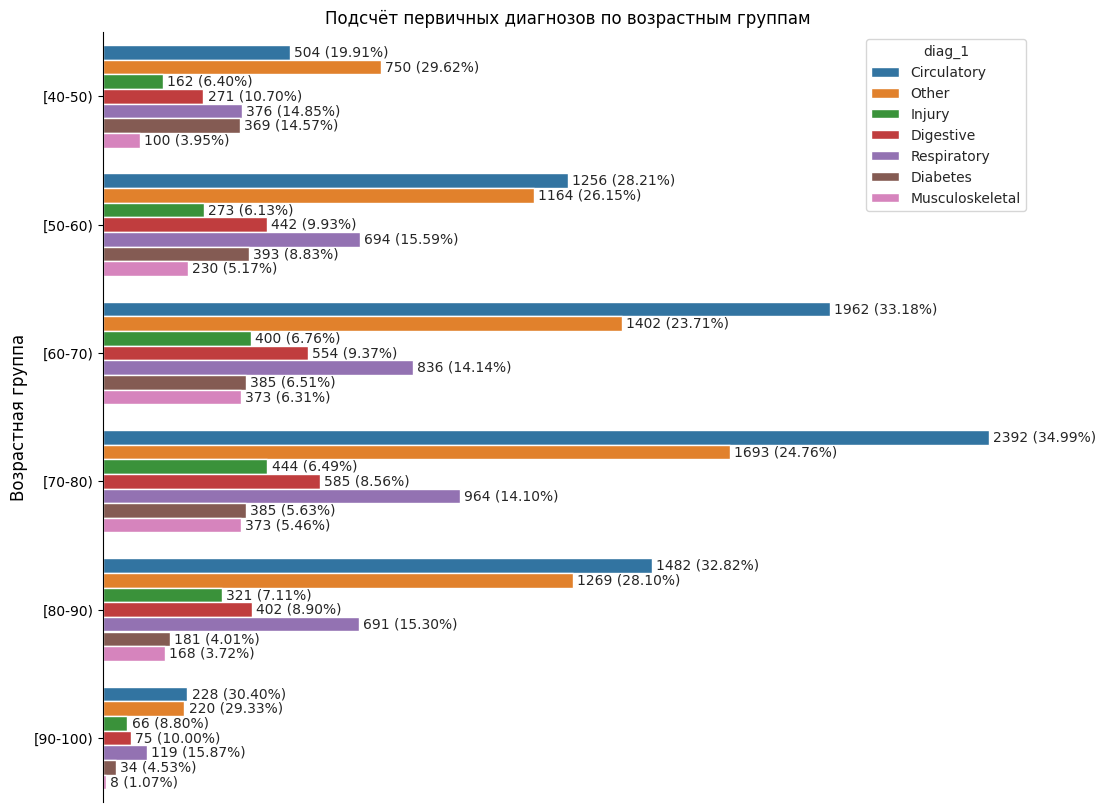

In [ ]:
# Таблица ранжирования диагнозов по возрастным группам
def the_most_common_diag_1():
    # График диагностики по возрастным группам
    age_group = df.groupby(['age', 'diag_1']).size().reset_index()
    fig, ax = plt.subplots(figsize=(12, 10))
    #pivot_age_group - для того, чтобы потом смогли суммировать все болезни по каждому age
    pivot_age_group = (age_group.pivot(index='age', columns='diag_1', values=0))
    jn = 0 #начало отсчёта суммы
    sns.set_style('white')  #для того чтобы были пробелы между данными на графике
    diagnosis = df[df['diag_1'] != 'Missing'] #удаляем ошибку
    sns.countplot(y='age',hue='diag_1',
                  order=diagnosis.age.sort_values().unique(),
                  data=diagnosis)
    #добавляем цифры и процент сбоку
    for bar in ax.patches:
        width = bar.get_width()
        x = width
        #счётчик процентов
        if jn == len(pivot_age_group):
            jn = 0
        wi = (x/pivot_age_group.sum(axis=1).iloc[jn]) * 100
        y = bar.get_y() + bar.get_height() / 2

        label = f"{width:.0f}"+' '+f"({(wi):.2f}%)"
        ax.annotate(label, (x, y),
                    ha='left', va='center',
                    xytext=(3, 0), fontsize=10,
                    textcoords='offset points')
        jn += 1


    sns.despine(bottom=True)
    plt.ylabel('Возрастная группа', fontsize=12)
    plt.xlabel('')
    plt.xticks([])
    plt.title('Подсчёт первичных диагнозов по возрастным группам')

    plt.show()
the_most_common_diag_1()


Из рисунка делаем выоды:

*   Наиболее распространённые возраста в диапозоне от 50 до 90 лет
*   Среди большинства групп возрастов наиболее распространён диагноз Circulatory
*   Второй и третий по распространённости диагнозы Other и Respiratory, соответсвенно


**Задача №2**

Некоторые врачи полагают, что диабет может играть центральную роль в повторной госпитализации. Изучите влияние диагноза диабета на частоту повторной госпитализации.

Чтобы выяснить, какую роль играет диабет в повторной госпитализации, построим графики процентов повторной госпитализации различных диагнозов и сравним результаты(*Листинг 2*)

***Листинг 2:***

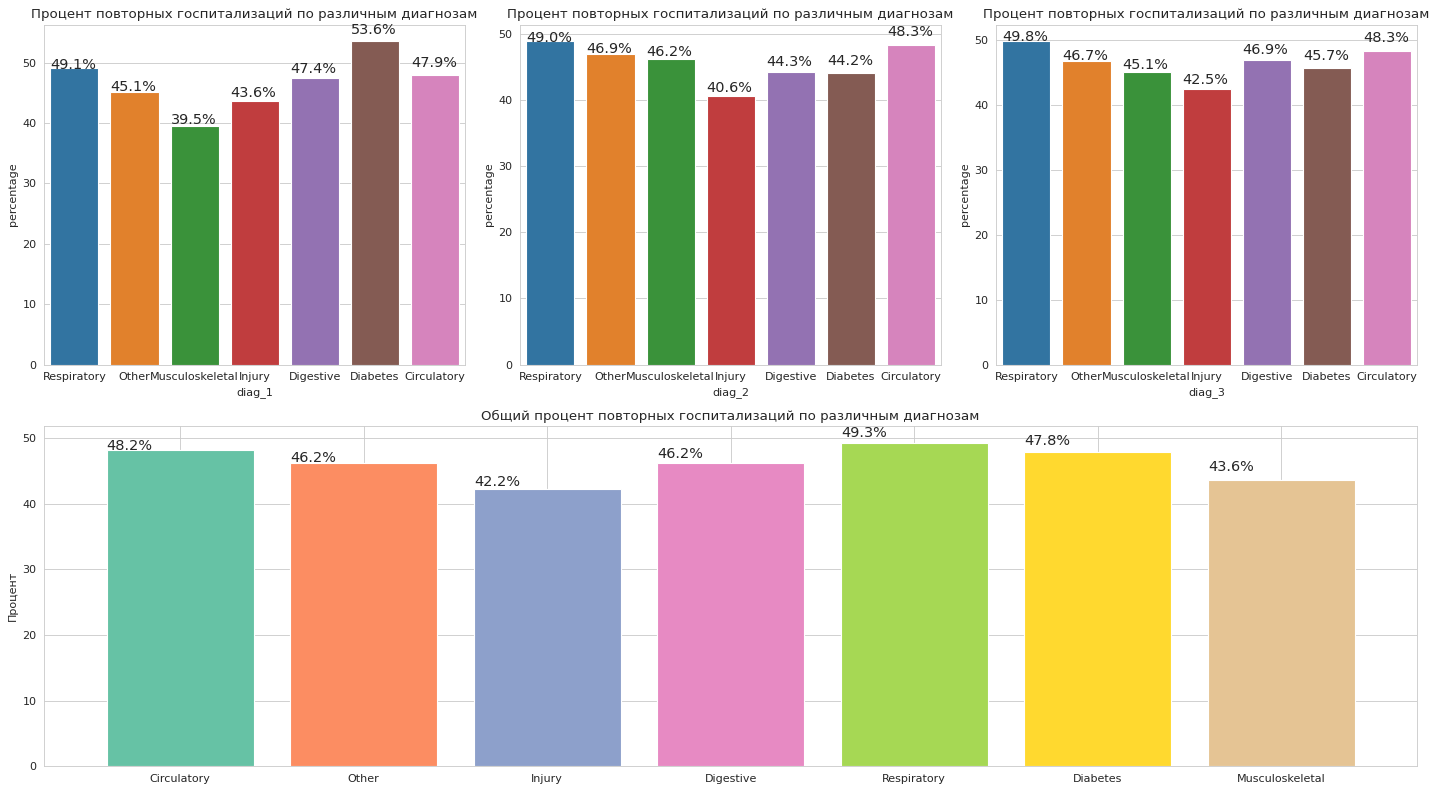

In [10]:
def the_impact_of_diabetes():
    # Функция show_percentages() используется для отображения процентных значений на графиках
    def show_percentages(ax, percent):
        for rect, v in zip(ax.patches, percent):
            v = round(v,1)
            wid = rect.get_x()
            ax.text(wid, rect.get_x()/4 + rect.get_height(), f'{v}%',  ha="left",    va="baseline",fontsize=13)
    # Функция diagnosis_sorting_function() фильтрует данные и сортирует их по заданному диагнозу, а затем вычисляет процент повторных госпитализаций для каждого диагноза
    def diagnosis_sorting_function(diag):
        df_filtered = df[df[diag] != 'Missing']

        model_origin = df_filtered.groupby(['readmitted',diag], as_index=False).size().sort_values(by=diag, ascending=False)
        model_origin['percentage'] = model_origin.groupby(diag)['size'].transform(lambda x: x/x.sum()*100)
        model_origin = model_origin[model_origin['readmitted'] != 'no']
        return model_origin

    sns.set_style('whitegrid') # добаляем сетку в графики
    diagnoses = ['Circulatory', 'Other', 'Injury', 'Digestive', 'Respiratory', 'Diabetes', 'Musculoskeletal']
    percentages = []
    # Отфильтруйте строки, в которых diag_1 не пропущен
    plt.figure(figsize=(18,10), dpi= 80)

    model_origin = diagnosis_sorting_function('diag_1')
    ax1 = plt.subplot(231)
    ax1.margins(0.05)
    ax1.set_title('Процент повторных госпитализаций по различным диагнозам')
    sns.barplot(x='diag_1', y='percentage',data=model_origin, ax=ax1)

    percent = model_origin['percentage'].values
    show_percentages(ax1, percent)
    #---------
    model_origin = diagnosis_sorting_function('diag_2')
    ax2 = plt.subplot(232)
    ax2.margins(0.05)
    ax2.set_title('Процент повторных госпитализаций по различным диагнозам')
    sns.barplot(x='diag_2', y='percentage', data=model_origin, ax=ax2)

    percent = model_origin['percentage'].values
    show_percentages(ax2, percent)
    #-----------
    model_origin = diagnosis_sorting_function('diag_3')
    ax3 = plt.subplot(233)
    ax3.margins(0.05)
    ax3.set_title('Процент повторных госпитализаций по различным диагнозам')
    sns.barplot(x='diag_3', y='percentage',data=model_origin, ax=ax3)

    percent = model_origin['percentage'].values
    show_percentages(ax3, percent)
    for diag in diagnoses:
        model_origin = diagnosis_sorting_function('diag_1')
        u1 = model_origin.loc[model_origin['diag_1'] == diag]
        yu1 = u1.iloc[0,3]

        model_origin = diagnosis_sorting_function('diag_2')
        u2 = model_origin.loc[model_origin['diag_2'] == diag]
        yu2 = u2.iloc[0,3]

        model_origin = diagnosis_sorting_function('diag_3')
        u3 = model_origin.loc[model_origin['diag_3'] == diag]
        yu3 = u3.iloc[0,3]

        yu = (yu1+yu2+yu3)/3
        percentages.append(yu)

    # Построение гистограммы для каждого диагноза
    ax4 = plt.subplot(212)
    ax4.bar(diagnoses, percentages)
    ax4.set_title('Общий процент повторных госпитализаций по различным диагнозам')
    ax4.set_ylabel('Процент')
    colors = sns.color_palette('Set2', n_colors=len(diagnoses))

    for i in range(len(diagnoses)):
        ax4.bar(diagnoses[i], percentages[i], color=colors[i])
    show_percentages(ax4, percentages)

    plt.tight_layout()
    plt.show()
the_impact_of_diabetes()


Мы можем видить интересную катину, при "diag_1" пациенты с диабетом повторно госпитализируются чаще чем другие пациенты и имеют рекордные 53,6%. Но при “diag_2”, “diag_3”  картина меняется, пациенты с диабетом повторно госпитализируются с примерно такой же периодичностью как остальные пациенты.

Посмотрев на общие проценты повторной госпитализации, видим, что диабет находится на третьем месте по самой частой госпитализации – это высоко, но, исходя из данного анализа, нельзя сказать что именно диабет играет ключевую роль в повторной госпитализации.


**Задача №3**

На каких группах пациентов больнице следует сосредоточить свои последующие усилия для улучшения мониторинга пациентов с высокой вероятностью повторной госпитализации?

Сначала выполним анализ данных по возрастным группам пациентов и частоте повторной госпитализации и визуализитуем результат(*Листинг 3*)

***Листинг 3:***

         age group  num patients  частота повторной передачи (%)  weights  \
age                                                                         
[40-50)    [40-50)          2532                           44.51  0.10128   
[50-60)    [50-60)          4452                           44.16  0.17808   
[60-70)    [60-70)          5913                           46.85  0.23652   
[70-80)    [70-80)          6837                           48.79  0.27348   
[80-90)    [80-90)          4516                           49.58  0.18064   
[90-100)  [90-100)           750                           42.13  0.03000   

          взвешенный коэффициент реадмиссии (%)  
age                                              
[40-50)                                    4.51  
[50-60)                                    7.86  
[60-70)                                   11.08  
[70-80)                                   13.34  
[80-90)                                    8.96  
[90-100)                         

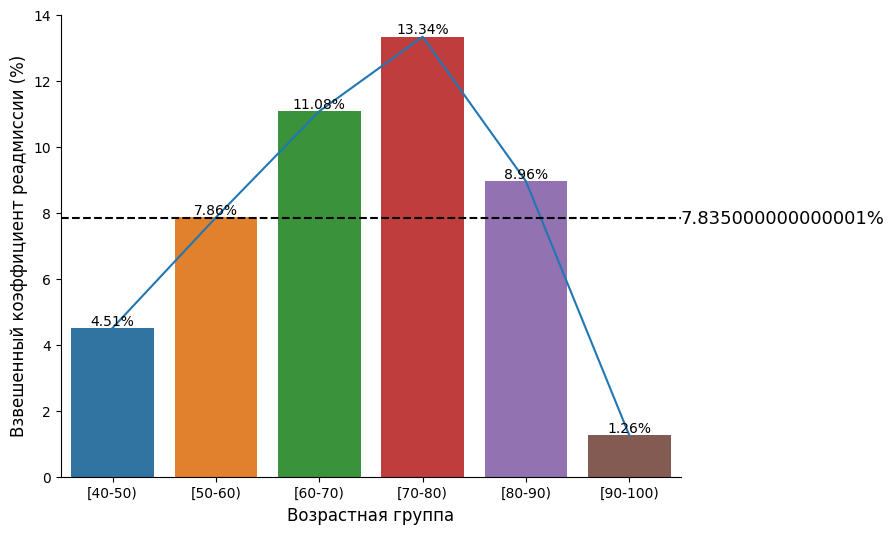

In [ ]:
def the_most_vulnerable_age():
    df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

    # Поиск уникальной возрастной группы, частоты повторной госпитализации и количества пациентов по возрастным группам
    mean = df.groupby('age')['readmitted'].mean().mul(100).round(2)

    patients = df.groupby('age').size()
    age_group = df.age.sort_values().unique()
    hp_by_age = pd.DataFrame({'age group': age_group, 'num patients': patients, 'частота повторной передачи (%)': mean})

    # Рассчитываем вес каждой возрастной группы на основе количества пациентов.
    hp_by_age['weights'] = hp_by_age['num patients'] / hp_by_age['num patients'].sum()

    # Вычисляем средневзвешенное значение для каждой возрастной группы
    hp_by_age['взвешенный коэффициент реадмиссии (%)'] = round(hp_by_age['частота повторной передачи (%)'] * hp_by_age['weights'], 2)

    # Таблица взвешенных показателей реадмиссии в разбивке по возрастным группам
    # Вычисляем средневзвешенную частоту повторной выдачи для сравнения
    average_readmissions = hp_by_age['взвешенный коэффициент реадмиссии (%)'].mean()
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.lineplot(x='age group', y='взвешенный коэффициент реадмиссии (%)', data=hp_by_age, ax=ax)
    sns.barplot(x='age group', y='взвешенный коэффициент реадмиссии (%)', data=hp_by_age, ax=ax)
    print(hp_by_age)

    percent = hp_by_age['взвешенный коэффициент реадмиссии (%)'].values
    # проставляем проценты у каждой группы возростов
    for i in range(len(hp_by_age)):
        ax.text(i, hp_by_age['взвешенный коэффициент реадмиссии (%)'][i], f"{percent[i]}%", ha='center', va='bottom')

    ax.axhline(y=average_readmissions, color='black', linestyle='--')
    ax.text(len(hp_by_age) - 0.5, average_readmissions,
         f'{average_readmissions}%',
         ha='left', va='center',
         color='black', fontsize=13)

    ax.set_xlabel('Возрастная группа', fontsize=12)
    ax.set_ylabel('Взвешенный коэффициент реадмиссии (%)', fontsize=12)
    sns.despine()

    plt.show()

the_most_vulnerable_age()

Из полученной диаграммы мы можем сжелать вывод, что пациенты от 60-90 лет наиболее часто поторно госпитализируются, а пациенты возрастом 40-50 и 90-100 - наиболее редко

Текперь углубимся в вопрос, и поймём с какими критериями пациенты чаще/реже повторно госпитализируются(*Листинг 4*)

***Листинг 4:***

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [9]:
def which_categories_are_hospitalized(data):
    data = pd.get_dummies(data)
    pd.set_option('display.max_columns', None)
    #print(data.describe())

    # масштабируем числовые признаки
    data[['time_in_hospital', 'n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']] = \
        (data[['time_in_hospital',
               'n_lab_procedures','n_procedures',
               'n_medications','n_outpatient',
               'n_inpatient','n_emergency']]- data[['time_in_hospital', 'n_lab_procedures',
                                                    'n_procedures','n_medications','n_outpatient',
                                                    'n_inpatient','n_emergency']].mean())/ data[['time_in_hospital',
                                                                                                 'n_lab_procedures',
                                                                                                 'n_procedures',
                                                                                                 'n_medications',
                                                                                                 'n_outpatient',
                                                                                                 'n_inpatient','n_emergency']].std()

    # разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(data.drop('readmitted_yes', axis=1), data['readmitted_yes'], test_size=0.2, random_state=42)

    # обучаем модель логистической регрессии
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # делаем предсказания на тестовой выборке
    y_pred = model.predict(X_test)

    # оцениваем качество модели
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred)))

    # выводим важность признаков

    importance = model.coef_[0]

    def feature_selection(name,vec):
        features = data.columns[:-1]
        top_features = dict(zip(features, importance))
        top_features = sorted(top_features.items(), key=lambda x: x[1], reverse=vec)[:10]

        print("\n" + name + ":")
        for feature, score in top_features:
            print("{}: {:.5f}".format(feature, score))
    '''
    # показывает зависимость всех параметров от readmitted
    for i,v in enumerate(importance):
        print('Feature: {}, Score: {:.5f}'.format(data.columns[i], v))
    '''
    feature_selection('Группы пациентов, которые наиболее часто госпитализируются',True)
    feature_selection('Группы пациентов, которые наиболее редко госпитализируются',False)

    # определяем категории людей наиболее подверженных повторной госпитализации
    # смотрим на важность признаков, которые наиболее сильно влияют на целевую переменную
    # например, возраст (age), время в госпитале (time_in_hospital), количество лабораторных процедур (num_lab_procedures)
which_categories_are_hospitalized(df)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Группы пациентов, которые наиболее часто госпитализируются:
n_inpatient: 0.21165
diag_1_Diabetes: 0.06179
n_outpatient: 0.06176
n_emergency: 0.06068
diabetes_med_yes: 0.05499
age_[80-90): 0.05067
medical_specialty_Missing: 0.04098
age_[70-80): 0.03988
A1Ctest_no: 0.03868
diag_2_Circulatory: 0.03501

Группы пациентов, которые наиболее редко госпитализируются:
readmitted_no: -13.18390
diabetes_med_no: -0.05532
medical_specialty_Surgery: -0.04918
age_[90-100): -0.04880
diag_1_Other: -0.04807
diag_3_Missing: -0.04224
diag_1_Injury: -0.04059
A1Ctest_normal: -0.04026
age_[40-50): -0.03964
medical_specialty_Other: -0.03947


**Выводы:**
1. Предыдущие обращения к стационарным(n_inpatient), амбулаторным(n_outpatient) и неотложным(n_emergency) врачам  являются наиболее часто госпитализирующеми группами.
2. Пациенты с диагнозом диабета (diag_1_Diabetes) также имеют высокую частоту госпитализации, что может указывать на необходимость более интенсивного медицинского наблюдения и ухода.
3. Пациенты чаще госпитализируются, если специальность принимающего врача - отсутствует.
4. Возрастные группы от 70 до 90 лет (age_[70-80), age_[80-90)) также имеют высокую частоту госпитализации, что подчеркивает важность уделять особое внимание медицинскому уходу для этой категории пациентов
5. Пациенты, которые реже повторно госпитализируются, это пациенты без диабета(или которым не назначили лекарства от диабета), имеющие нормальные A1Ctest и это те пациенты, у которых приёмный врач имеет специальность - хирург.


В следствии мы можем сделать вывод, что,действительно, предположения врычей - верно и поторная госпитализация сильно зависит от наличия диабета, но также стоит заметить, что по мимо диабета, на повторную госпитализацию также сильно влияют такие параметры, как возраст, специальность принимающего врача и наличие предыдущих обрацений к стационарным, амбулаторным и неотложным врачам.